In [135]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import imutils 
import easyocr 

In [136]:
# read the image.

In [137]:
img_path = r"20-1461155075-black.jpg"           

[[[161 218 243]
  [161 218 243]
  [161 218 243]
  ...
  [194 215 230]
  [203 222 237]
  [208 227 242]]

 [[151 205 228]
  [151 205 228]
  [152 206 229]
  ...
  [196 217 232]
  [205 224 239]
  [210 230 245]]

 [[155 204 225]
  [155 204 225]
  [155 204 226]
  ...
  [201 220 235]
  [209 226 241]
  [215 232 247]]

 ...

 [[ 40  50  58]
  [ 40  50  58]
  [ 40  50  58]
  ...
  [115 128 144]
  [119 132 148]
  [121 134 150]]

 [[ 44  55  61]
  [ 44  55  61]
  [ 44  55  61]
  ...
  [137 149 164]
  [139 151 166]
  [139 151 166]]

 [[ 47  56  60]
  [ 47  56  60]
  [ 47  56  60]
  ...
  [153 162 172]
  [154 163 173]
  [155 164 174]]]


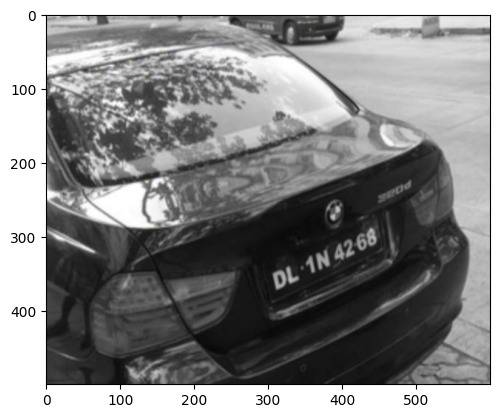

In [138]:
img = cv2.imread(img_path)       
img = cv2.resize(img, (500, 500))   
print(img) 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BAYER_BG2BGR))

In [139]:
# here we go to edges detection .

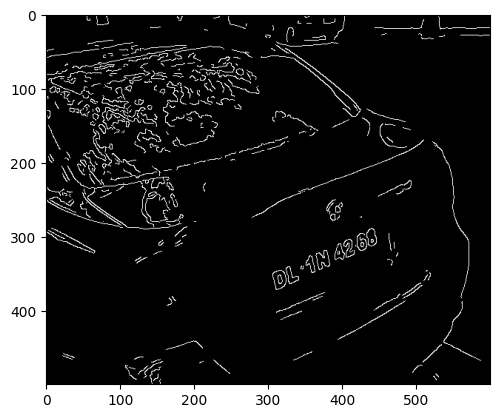

In [140]:
Filter = cv2.bilateralFilter(gray, 11, 17, 17)      #noise reduction
edged = cv2.Canny(Filter, 200, 250)    #Edge Detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [141]:
# find contours and Apply Mask.

In [142]:
keys = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
contours = imutils.grab_contours(keys) 
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] 

In [143]:
location = None 
for contour in contours: 
    approx = cv2.approxPolyDP(contour, 10, True) 
    if len(approx) == 4:  
        location = approx 
        break 

# print(location)

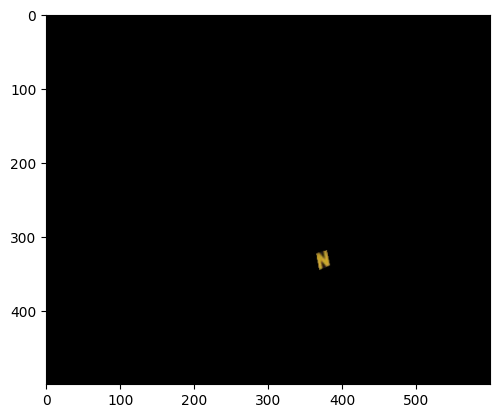

In [144]:
mask = np.zeros(gray.shape, np.uint8) 
new_img = cv2.drawContours(mask, [location], 0, 255, -1) 
new_img = cv2.bitwise_and(img, img, mask=mask) #use to findout the segment of number plate.
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))  #here we get co-ordinate on number plate is.



In [145]:
#here we extract the number plate of the car.

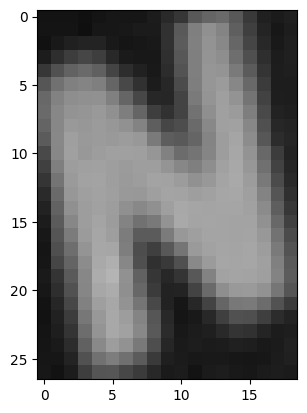

In [146]:
(x,y) = np.where(mask==255) 
(x1, y1) = (np.min(x), np.min(y)) 
(x2, y2) = (np.max(x), np.max(y)) 

cropped_img = gray[x1:x2+1, y1:y2+1]  
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

In [147]:
reader = easyocr.Reader(['en']) 
result = reader.readtext(cropped_img) 
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


KeyboardInterrupt: 

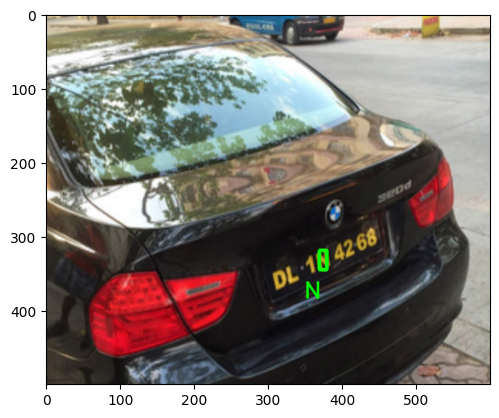

In [148]:
text = result[0][-2]   # we are taking the last se 2nd elemnt of the 2d array.
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [149]:
# img = cv2.putText(img, text[0][1], (x2-200,y2+75), cv2.FONT_HERSHEY_PLAIN, 2, (255, 255, 255), 4) 

In [150]:
cv2.imshow("Image", img) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 